<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/ML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

A1. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND
gate logic. The activation function is demonstrated below.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
def step_func(z):
  return 1 if (z>0) else 0
def Bipolar_step_func(z):
  return 1 if (z>0) else -1
def Relu_func(z):
  return z if (z>0) else 0
def sigmoid_func(z):
  x=1/(1+math.exp(-z))
  return x

# Perceptron Code
class Perceptron:
  def __init__(self,weights,epochs,activation_func,learning_rate):
    self.w=weights
    self.af=activation_func
    self.a=learning_rate
    self.epoch=epochs
    self.error=[]
    self.e_count=0
  def learn(self,data):
    n=len(data[0])
    print(f"Initial Weights:{self.w}",)

    for epoch in range(self.epoch):

      self.e_count +=1
      total_error=0.0
      for value in data:
        x=self.w[0]
        for i in range(1,len(self.w)):
          x += value[i-1]*self.w[i]

        # Activation Function

        y=0
        if self.af=='step':
          y=step_func(x)
        elif self.af=='bipolar':
          y=Bipolar_step_func(x)
        elif self.af=='Relu':
          y=Relu_func(x)
        elif self.af=='sigmoid':
          y=sigmoid_func(x)

        # Error Calculation
        err=(value[len(self.w)-1]-y)
        total_error += (err*err)

        # Weight Updation
        for i in range(len(self.w)):
          if i==0:
            self.w[i] +=(self.a*err)
          self.w[i] += (value[i-1]*self.a*err)

      self.error.append(total_error)
      if total_error <= 0.002:
        return self.error
        break
    print(f"Final weights : {self.w}, Epochs = {self.e_count}")
    return self.error
  def epoch_count(self):

    return self.e_count
  def graph(self):
    plt.figure(figsize = (12, 9))
    plt.plot(range(len(self.error)), self.error)
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.title(f"epochs vs error")
    plt.show()
# Another code for Perceptron
def perceptron(weights,activation_function,learning_rate,data,epoch):
    e_count = 0
    error = []
    i=0
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]

    while i < epoch:
        e_count = e_count + 1
        j = 0
        e = []
        while j < len(data):
            x1 = data[j][0]
            x2 = data[j][1]
            target = data[j][2]
            z = w0 + x1*w1 + x2*w2
            #if-else ladder to make calling activation functions easier
            if activation_function=='step':
                y = step_func(z)
            elif activation_function=='bipolar':
                y = Bipolar_step_func(z)
            elif activation_function=='relu':
                y = Relu_func(z)
            elif activation_function=='sigmoid':

                y = sigmoid_func(z)
            if y == target: # Checking if obtained output is same as expected/targetted output
                e.append(0)
            else: # Weight updating
                w1 = w1 + learning_rate*(target - y)*x1
                w2 = w2 + learning_rate*(target - y)*x2
                w0 = w0 + learning_rate*(target - y)
                err = y - target  # obtained - expected output
                e.append(err)
            j = j + 1
        error.append(sum(e))
        if sum(e) <= 0.002:
            break
        i = i + 1
    print("Final Weights are : \n",w1,'\n',w2,'\n',w0,'\n')
    plt.figure(figsize = (12, 9))
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error")
    plt.plot(error)
    plt.show()

and_gate=[[0,0,0],
          [0,1,0],
          [1,0,0],
          [1,1,1]]
xor_gate=[[0,0,0],
          [0,1,1],
          [1,0,1],
          [1,1,0]]


Initial Weights:[10, 0.2, -0.75]
Final weights : [-7.646661082105766e-15, 0.1000000000000001, 0.05000000000000032], Epochs = 1000


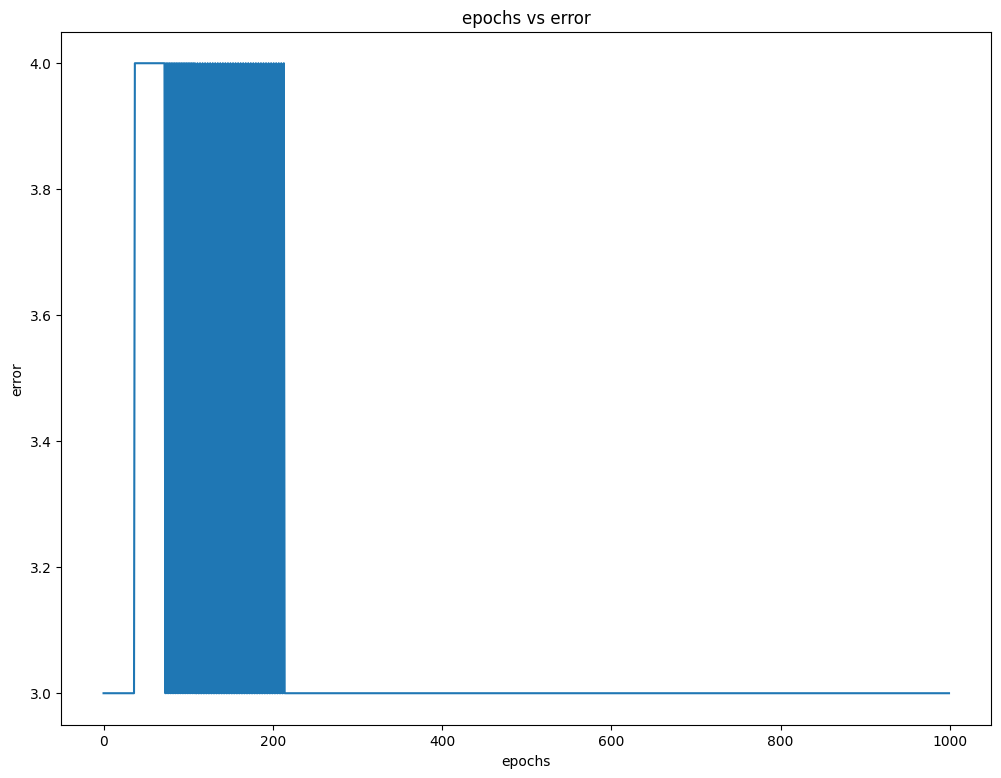

In [ ]:
And = Perceptron([10,0.2,-0.75],1000,'step',0.05)
And.learn(and_gate)
And.graph()


 A2)Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function


Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


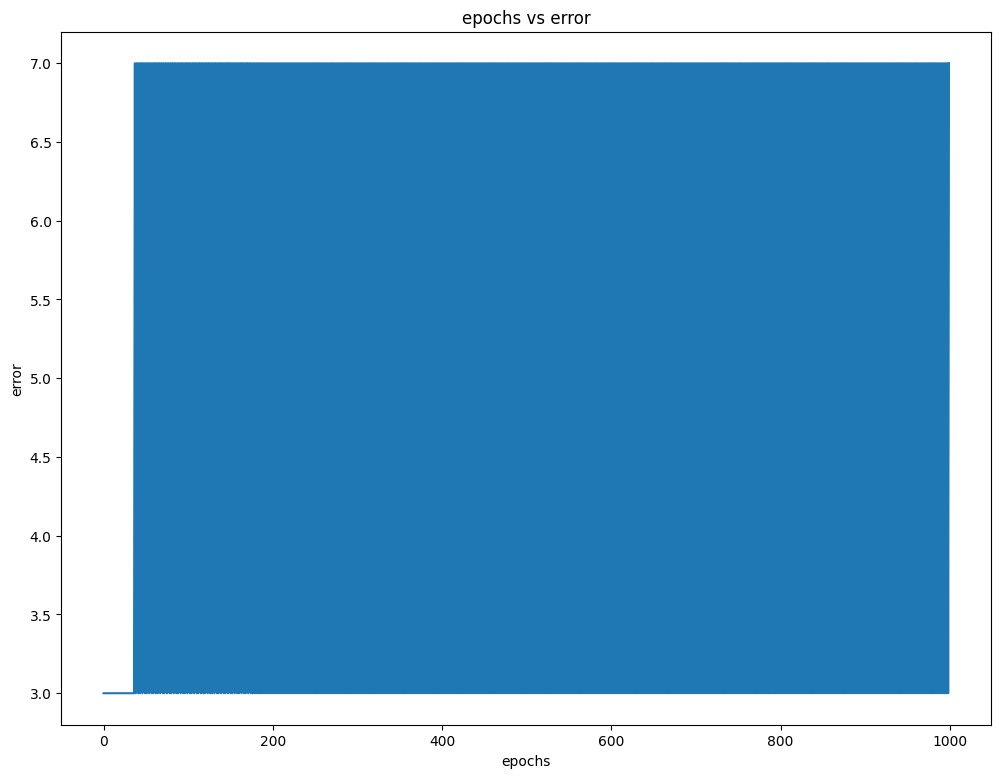

In [ ]:
# Bipolar Step Function
and_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
and_2.learn(and_gate)
and_2.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [-2.628285432165413, 1.7528425503169744, 1.7378039027326262], Epochs = 1000


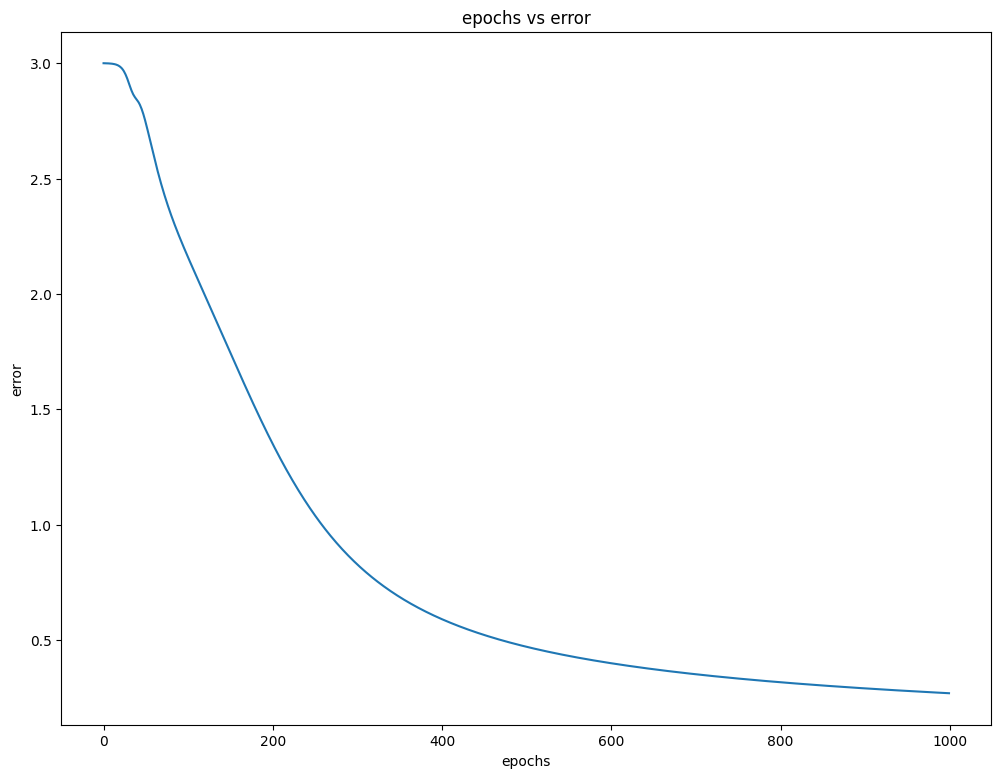

In [ ]:
# Sigmoid Function
and_3 = Perceptron([10,0.2,-0.75],1000,'sigmoid',0.05)
and_3.learn(and_gate)
and_3.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [109.99999999999588, 50.199999999999285, 49.24999999999934], Epochs = 1000


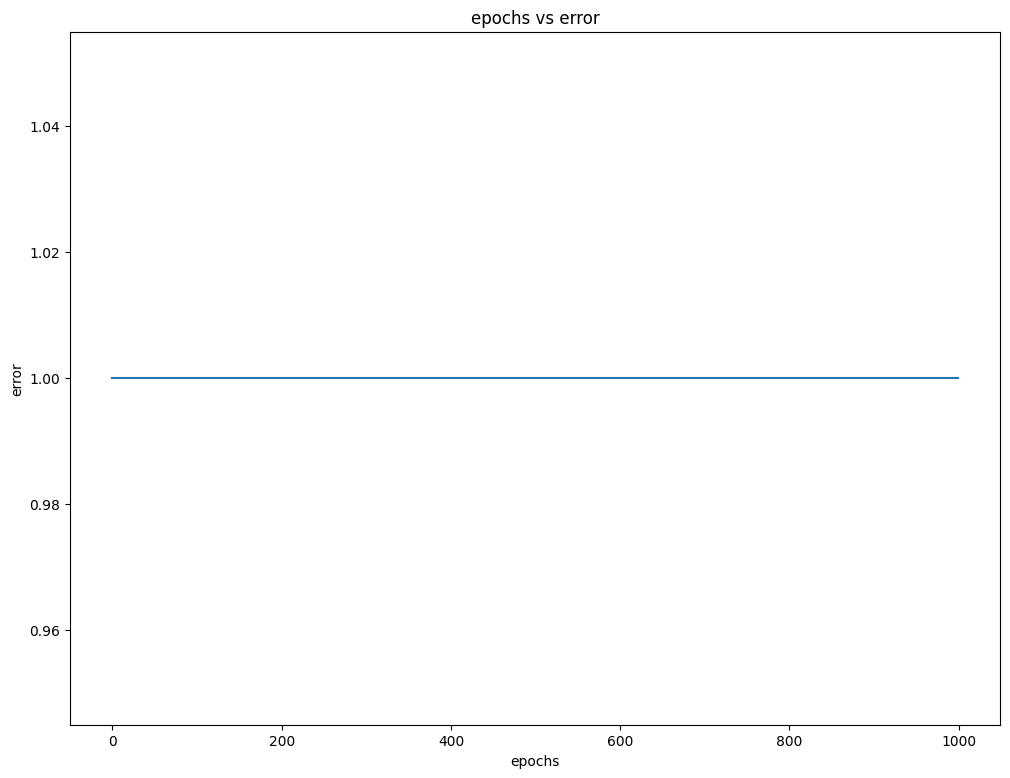

In [ ]:
# ReLU Function
and_4 = Perceptron([10,0.2,-0.75],1000,'relu',0.05)
and_4.learn(and_gate)
and_4.graph()


A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.

Initial Weights:[10, 0.2, -0.75]
Final weights : [-3.5385648723861842, 2.393722114096895, 2.369645614250453], Epochs = 1000
[1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.34910075148687, 2.971570490653871, 2.9322343173162055], Epochs = 1000
[1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.800271329248686, 3.301417583274812, 3.2486905182188353], Epochs = 1000
[1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.115077445658475, 3.5371259162036783, 3.4720615651714937], Epochs = 1000
[1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.35773589807897, 3.7228829437590805, 3.646182728321556], Epochs = 1000
[1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.555744885152337, 3.877626716793616, 3.789800098564246], Epochs = 1000
[1000, 1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.723435001191182, 4.01124344795238, 3.9126814236696554], Epochs = 1000
[10

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

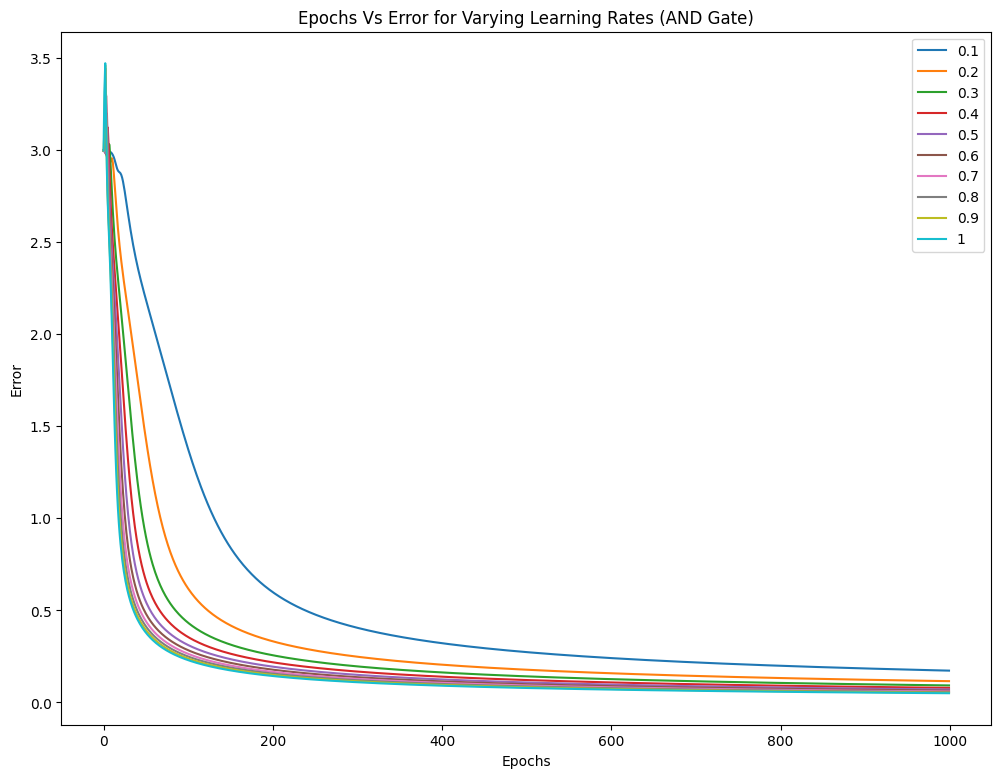

In [ ]:

learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
epochs = []
for i in learning_rate:
  P=Perceptron([10,0.2,-0.75],1000,'sigmoid',i)
  errors.append(P.learn(and_gate))
  epochs.append(P.epoch_count())
  print(epochs)
  plt.figure(figsize=(12,9))
for i in errors:
    plt.plot(range(1000), i)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error for Varying Learning Rates (AND Gate)")
    plt.legend(learning_rate)


A4. Repeat the above exercises, A1 to A3, for XOR gate logic.


Initial Weights:[10, 0.2, -0.75]
Final weights : [0.19999999999999235, -0.1499999999999997, -0.09999999999999969], Epochs = 1000


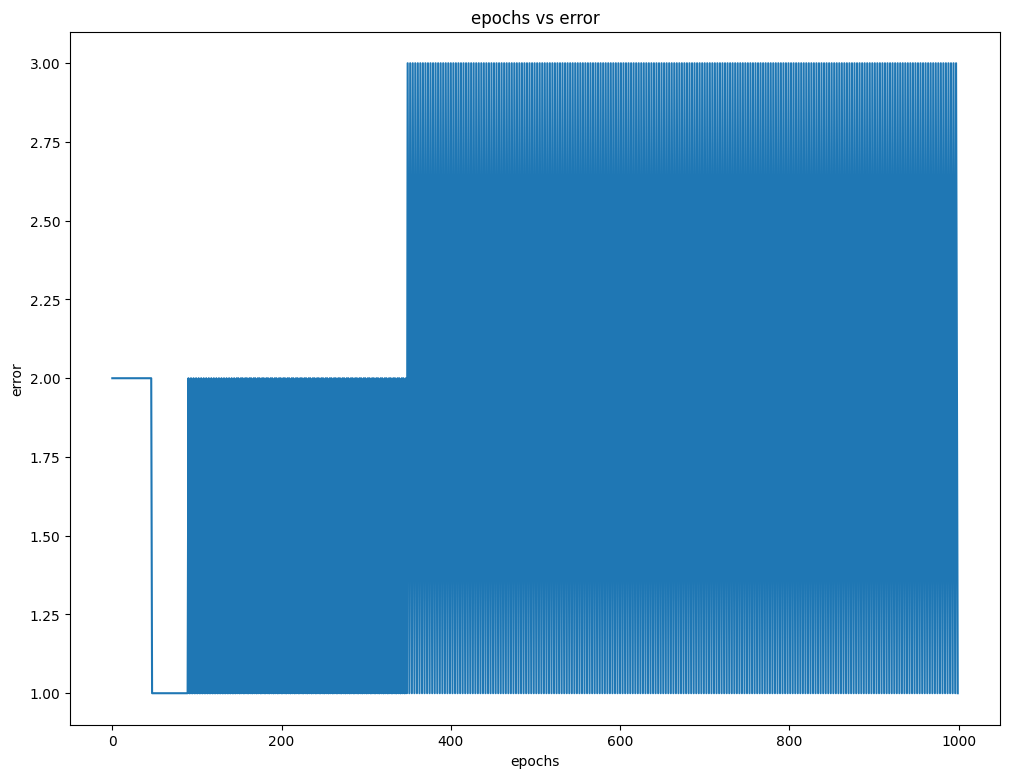

In [ ]:
# A1 for xor
Xor = Perceptron([10,0.2,-0.75],1000,'step',0.05)
Xor.learn(xor_gate)
Xor.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


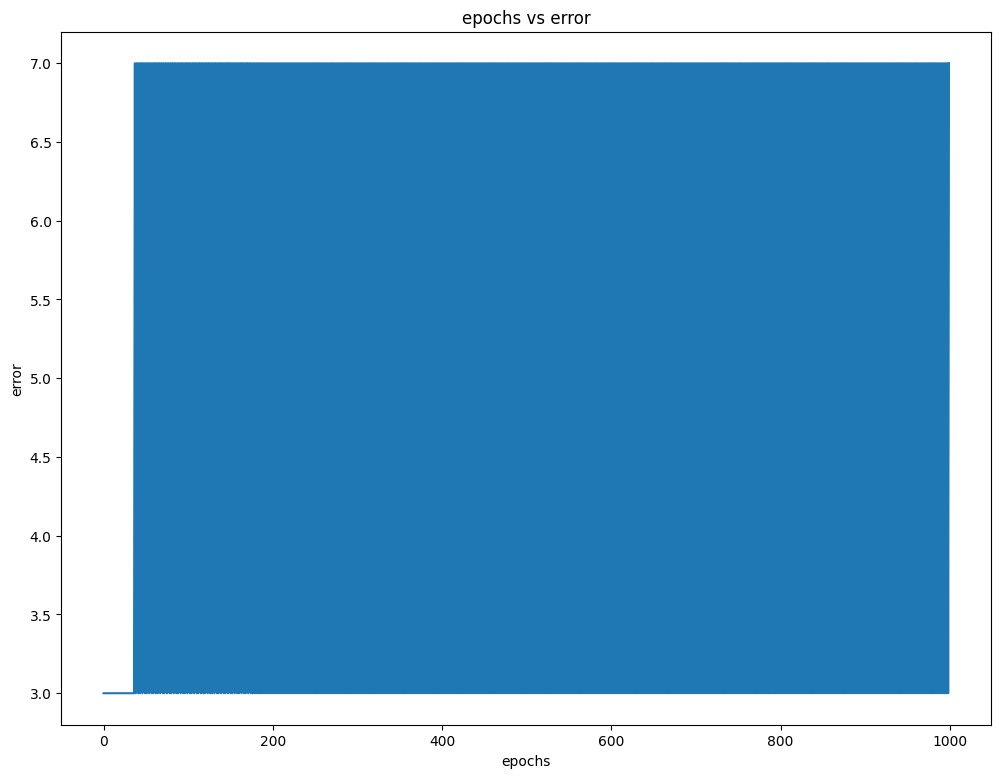

In [ ]:
# A2 for xor
# Bipolar Function
xor_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
xor_2.learn(and_gate)
xor_2.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


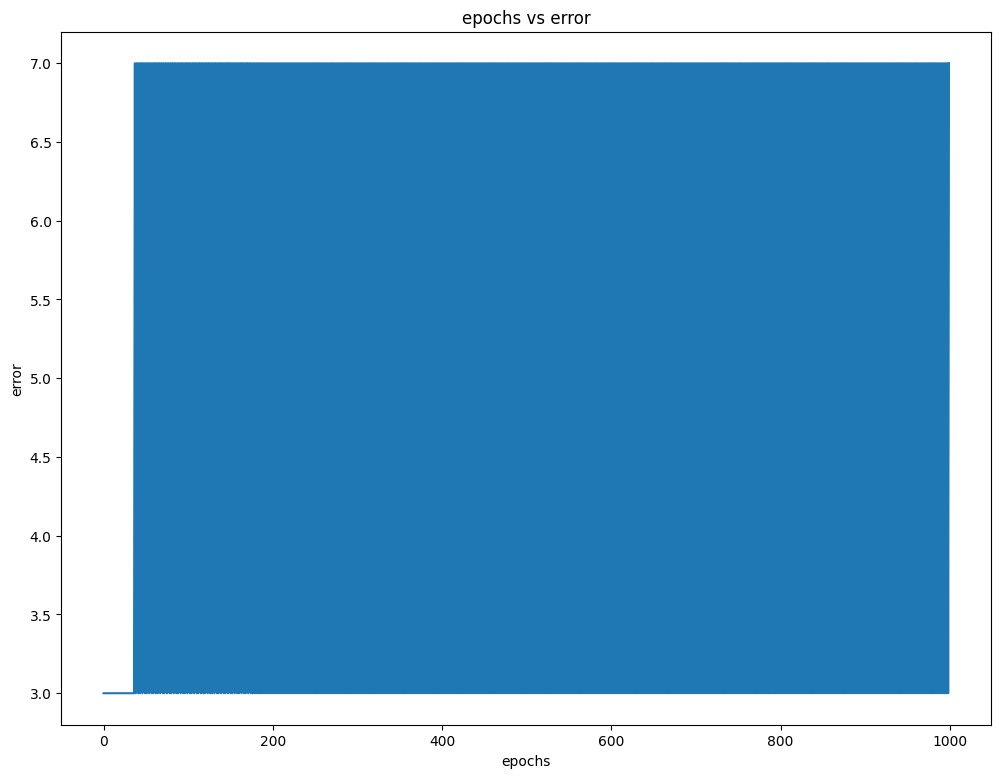

In [ ]:
# A2 for xor
# Bipolar Function
xor_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
xor_2.learn(and_gate)
xor_2.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [-2.628285432165413, 1.7528425503169744, 1.7378039027326262], Epochs = 1000


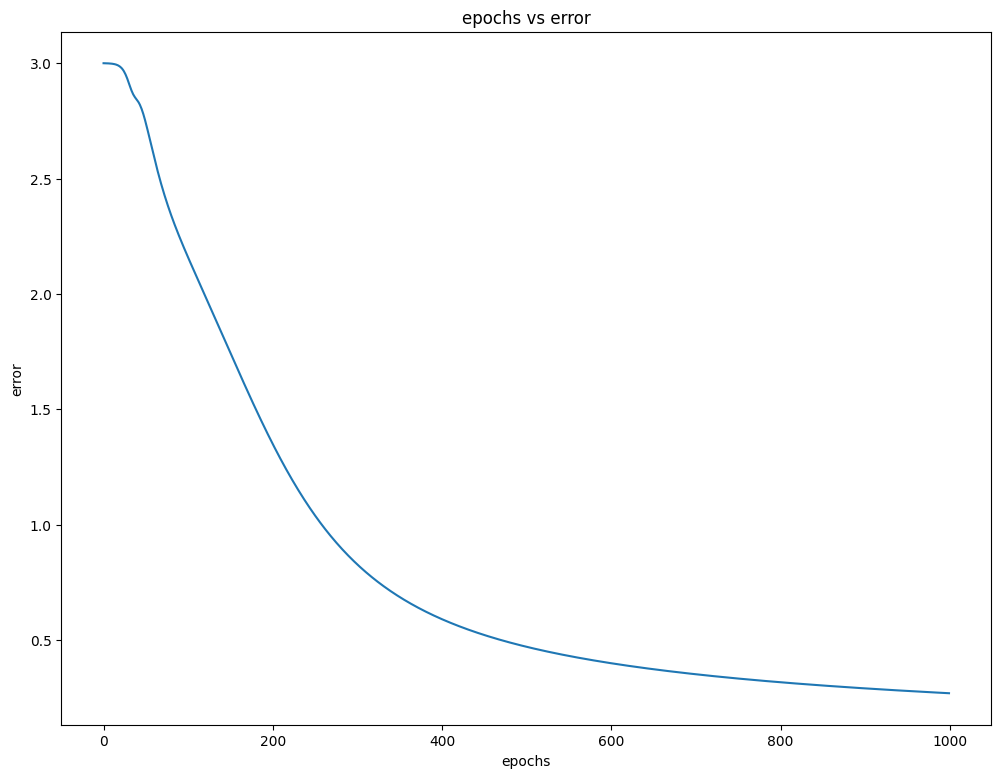

In [ ]:
# Sigmoid Function
xor_3 = Perceptron([10,0.2,-0.75],1000,'sigmoid',0.05)
xor_3.learn(and_gate)
xor_3.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [109.99999999999588, 50.199999999999285, 49.24999999999934], Epochs = 1000


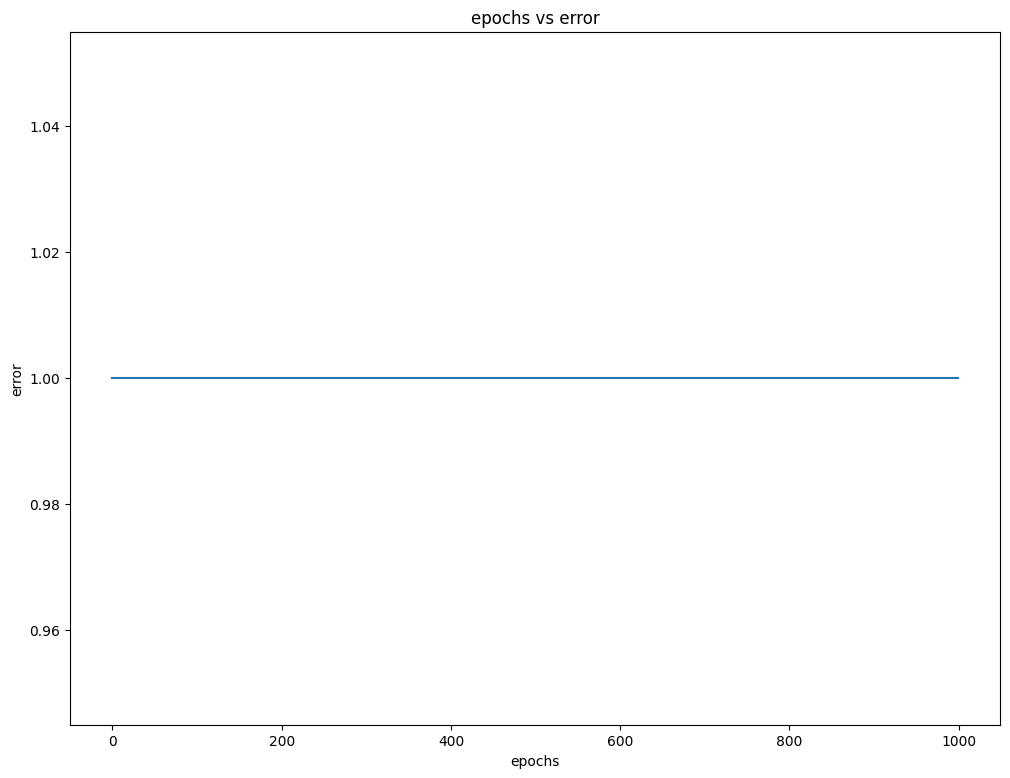

In [ ]:
# ReLU Function
xor_4 = Perceptron([10,0.2,-0.75],1000,'relu',0.05)
xor_4.learn(and_gate)
xor_4.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [2.622570267463035, -1.7910888487600722, -1.7292357499582947], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [2.78474848248969, -1.940221927548809, -1.8146442552974664], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [2.9680496735667763, -2.1055144109274018, -1.9152924858148739], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.159891641363517, -2.277136065913149, -2.0213236084429], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.359384966725389, -2.4543479373459824, -2.1322109980524475], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.5655753343688996, -2.6363827807339657, -2.2473839440019168], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.777473903568473, -2.8224679226455374, -2.366239942245704], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.994121017762747, -3.011870778602121, -2.4881856284616863], Epochs = 500
Initia

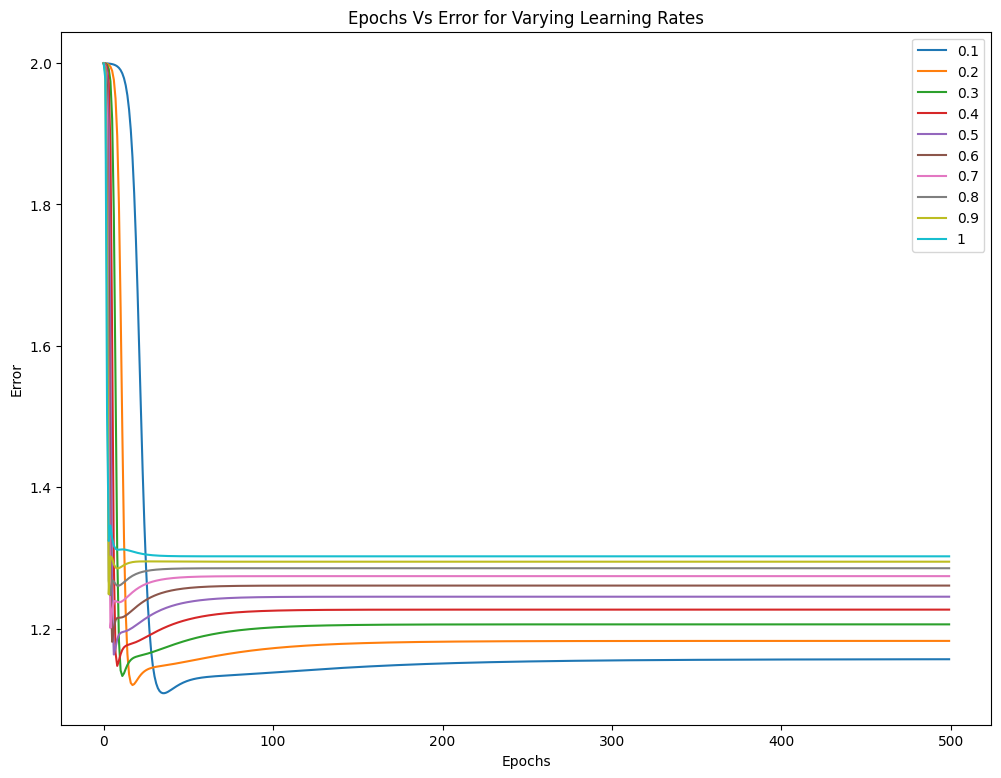

In [ ]:
# A3 for Xor gate
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
epochs = []
for i in learning_rate:
  P_x=Perceptron([10,0.2,-0.75],500,'sigmoid',i)
  errors.append(P_x.learn(xor_gate))
  epochs.append(P_x.epoch_count())
print(epochs)
plt.figure(figsize=(12,9))
for i in errors:
    plt.plot(range(500), i)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error for Varying Learning Rates")
    plt.legend(learning_rate)


A5. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)
df

,Candies,Mangoes Milk,Packets,Payment High,Value
0,20,6,2,386,Yes
1,16,3,6,289,Yes
2,27,6,2,393,Yes
3,19,1,2,110,No
4,24,4,2,280,Yes
5,22,1,5,167,No
6,15,4,2,271,Yes
7,18,4,2,274,Yes
8,21,1,4,148,No
9,16,2,4,198,No


Initial Weights:[0.2, -0.75, 1, 10]


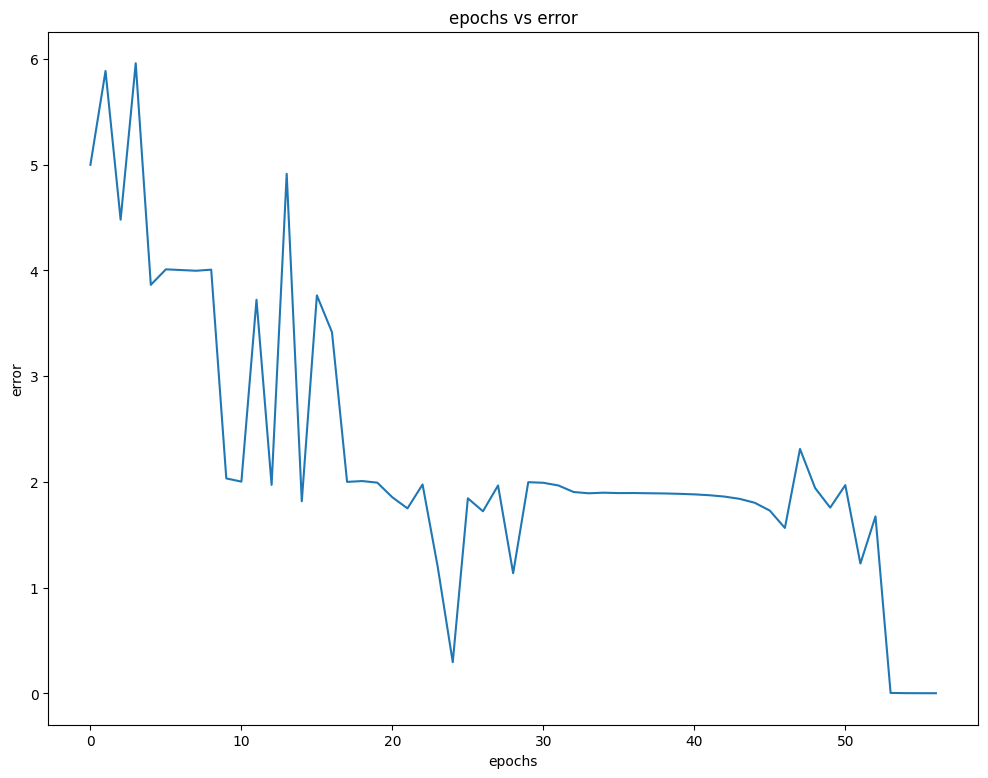


[4.9983302607733915, 5.88568961960136, 4.479352755317259, 5.95913101598713, 3.863582211502779, 4.010182863746873, 4.003485646097672, 3.996794827942508, 4.007029755574035, 2.033256789861716, 2.00271998062469, 3.722253864295893, 1.9719179426455902, 4.913423729213241, 1.8172368734704398, 3.7640575320480845, 3.4159234606344375, 2.000268269785882, 2.008168439799655, 1.9931973892168886, 1.8544916707111962, 1.7498028671585624, 1.975774495915258, 1.1999319952549343, 0.2954942457738477, 1.845188934511466, 1.722507636728363, 1.9663257164551828, 1.136868105356768, 1.9973344710987, 1.9919007489987504, 1.9663291106212366, 1.9047892439840988, 1.8924865246912321, 1.8980981088931197, 1.8943308795704346, 1.895024138808941, 1.8927411135957617, 1.8909983264985395, 1.8873916474474974, 1.882310200989986, 1.8741040981669381, 1.8612181346838836, 1.8399892107102689, 1.8029273477975192, 1.7288158178956081, 1.5645951896451322, 2.312008177012116, 1.942388046406942, 1.7567727068591708, 1.9695788961161145, 1.2282

In [ ]:
c=Perceptron([0.2,-0.75,1,10],1000,'sigmoid',0.1)
customer = [[20,6,2,1],[16,3,6,1],[27,6,2,1],[19,1,2,0],[24,4,2,1],[22,1,5,0],[15,4,2,1],[18,4,2,1],[21,1,4,0],[16,2,4,0]]
t=c.learn(customer)
c.graph()
print()
print(t)

A6. Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse

In [ ]:
A = df.iloc[:,0:3]
C = df.iloc[:,3:4]
A

,Candies,Mangoes Milk,Packets
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [ ]:
C


,Payment High
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [ ]:
Inv_A = np.linalg.pinv(A)
X=np.matmul(Inv_A,C)
print("Cost of Each Product is Matrix X:", X)
c_1=Perceptron([0.2,-0.75,1,10],1,'sigmoid',0.1)
y = c_1.learn(customer)

Cost of Each Product is Matrix X:    Payment High
0           1.0
1          55.0
2          18.0
Initial Weights:[0.2, -0.75, 1, 10]
Final weights : [0.30059516480095416, -3.0416687240330256, 1.5016289350097365, 9.300592316139257], Epochs = 1


In [ ]:
dim1 = 20 #x-dimension
dim2 = 20 #y-dimension
data = {'x1':[],'x2':[],'label':[]}
for x_c in range(dim1):
    for y_c in range(dim2):
        if x_c % 2 == 0 and y_c % 2 == 0:
            label = 1
        elif x_c % 2 == 1 and y_c % 2 == 1:
            label = 1
        else:
            label = 0
        data['x1'].append(x_c)
        data['x2'].append(y_c)
        data['label'].append(label)
data = pd.DataFrame(data)
data

,x1,x2,label
0,0,0,1
1,0,1,0
2,0,2,1
3,0,3,0
4,0,4,1
...,...,...,...
395,19,15,1
396,19,16,0
397,19,17,1
398,19,18,0


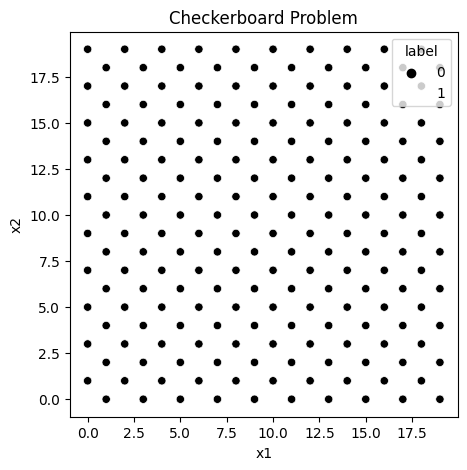

In [ ]:
# Visualization of checker board problem
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure.
fig = plt.figure(figsize=(5, 5))

# Create a scatter plot of the checkerboard dataset, colored by the label.
sns.scatterplot(x="x1", y="x2", hue="label", data=data, palette=["black", "white"])

# Add a title and axis labels.
plt.title("Checkerboard Problem")
plt.xlabel("x1")
plt.ylabel("x2")

# Show the plot.
plt.show()


A7. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.

In [ ]:
# Question A1
# AND gate backpropagation algorithm
v10,v20 = 0.1,0.04 # Biases

v11,v12,v21,v22 = 0.2,-0.75,10,0.09 # input layer weights
w0,w1,w2 = 0.2,0.4,0.6 # output layer weights
learning_rate = 0.05

# input vectors
x1 = [0,0,1,1]
x2 = [0,1,0,1]
bias = [1,1,1,1]

output = [0,0,0,1]
target_out = 0

h1,h2 = 0,0 # hidden layer units
target_out1, target_out2 = 0, 0

e_count = 0
while (e_count < 1000):
    print("Epoch: ",e_count+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        target_out1 = 1/(1+ np.exp(-h1))
        target_out2 = 1/(1+ np.exp(-h2))
        target_out = 1/(1+ np.exp(-(w0 + target_out1 * w1 + target_out2 * w2)))
        if (target_out == output[i]):
            print("bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out2,"\npredicted output = ",target_out,"\n""actual output = ",output[i])
            continue
        else:
            derivative = target_out*(1 - target_out)
            deltak = derivative*(- target_out + output[i])
            deltah1 = target_out1*(1-target_out1)*(w1)*deltak
            deltah2 = target_out2*(1-target_out2)*(w2)*deltak
            w0 = w0 + learning_rate * deltak * 1
            w1 = w1 + learning_rate * deltak * target_out1
            w2 = w2 + learning_rate * deltak * target_out2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x2[i]),(v22 + learning_rate*deltah2*x2[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out2,"\n""predicted output = ",target_out,"\n""actual output = ",output[i])
    e_count = e_count + 1
    if abs(target_out - output[i]) < 0.002:
        print("The error is ",abs(target_out - output[i]))
        break
    else:
        continue

Streaming output truncated to the last 5000 lines.
actual output =  0

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.4082736893733814 
h2 unit =  0.2737654848710626 
predicted output =  0.24103880816126677 
actual output =  0

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999341284563165 
h2 unit =  0.253454316504142 
predicted output =  0.3882087706693955 
actual output =  1
Epoch:  850

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.4161417271893901 
h2 unit =  0.5151791283701354 
predicted output =  0.20693601762994063 
actual output =  0

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999362805804337 
h2 unit =  0.48861273981187053 
predicted output =  0.34283053760868054 
actual output =  0

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.4078645404959667 
h2 unit =  0.27367982795432527 
predicted output =  0.24093331551438468 
actual output =  0

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999340167677948 
h2 unit =  0.25330404123371597 
predicted output =  0.38845740681363305 
actual output =  1
Epoch

A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1.

In [ ]:
# Question A2
# XOR gate backpropagation algorithm
v10,v20 = 0.1,0.04 # Biases

v11,v12,v21,v22 = 0.2,-0.75,10,0.09 # input layer weights
w0,w1,w2 = 0.2,0.4,0.6 # output layer weights
learning_rate = 0.05

# input vectors
x1 = [0,0,1,1]
x2 = [0,1,0,1]
bias = [1,1,1,1]

output = [0,1,1,0]
target_out = 0

h1,h2 = 0,0 # hidden layer units
target_out1, target_out2 = 0, 0

e_count = 0
while (e_count < 1000):
    print("Epoch: ",e_count+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        target_out1 = 1/(1+ np.exp(-h1))
        target_out2 = 1/(1+ np.exp(-h2))
        target_out = 1/(1+ np.exp(-(w0 + target_out1 * w1 + target_out2 * w2)))
        if (target_out == output[i]):
            print("bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out2,"\npredicted output = ",target_out,"\n""actual output = ",output[i])
            continue
        else:
            derivative = target_out*(1 - target_out)
            deltak = derivative*(- target_out + output[i])
            deltah1 = target_out1*(1-target_out1)*(w1)*deltak
            deltah2 = target_out2*(1-target_out2)*(w2)*deltak
            w0 = w0 + learning_rate * deltak * 1
            w1 = w1 + learning_rate * deltak * target_out1
            w2 = w2 + learning_rate * deltak * target_out2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x2[i]),(v22 + learning_rate*deltah2*x2[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out2,"\n""predicted output = ",target_out,"\n""actual output = ",output[i])
    e_count = e_count + 1
    if abs(target_out - output[i]) < 0.002:
        print("The error is ",abs(target_out - output[i]))
        break
    else:
        continue

Streaming output truncated to the last 5000 lines.
actual output =  1

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.6267702264899222 
h2 unit =  0.3047855784509008 
predicted output =  0.4840016450358824 
actual output =  1

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999729884769382 
h2 unit =  0.3248955586888256 
predicted output =  0.5142106926271385 
actual output =  0
Epoch:  850

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.5224177085220687 
h2 unit =  0.4890828081357932 
predicted output =  0.492663957458971 
actual output =  0

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999584809455122 
h2 unit =  0.5118921529059671 
predicted output =  0.5244829021639952 
actual output =  1

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.6268662412424801 
h2 unit =  0.3047727776247931 
predicted output =  0.4839996209704101 
actual output =  1

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999729995866701 
h2 unit =  0.3248862301530499 
predicted output =  0.5142327130399713 
actual output =  0
Epoch:  851



A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].

In [ ]:
# Question A3
v10,v20 = 0.01,0.4

v11,v12,v21,v22 = 10,0.2,-0.75,0.09 # input layer weights
w10,w20 = 0.11,0.41

w11,w12,w21,w22 = -20,0.1,-1.2,0.7 # output layer weights
learning_rate = 0.05

# input vectors
bias = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]

# output vectors [x1 AND x2]
output_actual = [1,0,0,1]
output_actual1 = [0,1,1,0]
output_actual2 = [1,0,0,1]
output_predicted = 0

# hidden layer units
h1,h2 = 0,0

output_predicted1, output_predicted2 = 0, 0

iterations=0
while (iterations < 2500):
    print("Epoch",iterations+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        output_predicted1 = 1/(1+ np.exp(-h1))
        output_predicted2 = 1/(1+ np.exp(-h2))
        output_predicted01 = 1/(1+ np.exp(-(w10 + output_predicted1 * w11 + output_predicted2 * w21)))
        output_predicted02 = 1/(1+ np.exp(-(w20 + output_predicted1 * w12 + output_predicted2 * w22)))
        if (output_predicted01 == output_actual[i]):
            print("The Output 1: ")
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 = ",output_predicted1,"\n""h2 = ",output_predicted2,"\n""predicted output = ",output_predicted,"\n""actual output = ",output_actual[i])
            continue
        else:
            derivative = output_predicted01*(1-output_predicted01)
            deltak = derivative*(-output_predicted01 + output_actual1[i])
            deltah1 = output_predicted1*(1-output_predicted1)*(w11)*deltak
            deltah2 = output_predicted2*(1-output_predicted2)*(w21)*deltak
            w10 = w10 + learning_rate * deltak * 1
            w11 = w11 + learning_rate * deltak * output_predicted1
            w12 = w21 + learning_rate * deltak * output_predicted2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x2[i]),(v22 + learning_rate*deltah2*x2[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",output_predicted1,"\n""h2 unit = ",output_predicted2,"\n""predicted output = ",output_predicted,"\n""actual output = ",output_actual[i])
        if (output_predicted02 == output_actual[i]):
            print("The Output 2: ")
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 = ",output_predicted1,"\n""h2 = ",output_predicted2,"\n""predicted output = ",output_predicted,"\n""actual output = ",output_actual[i])
            continue
        else:
            derivative = output_predicted02*(1-output_predicted02)
            deltak = derivative*(-output_predicted02 + output_actual2[i])
            deltah1 = output_predicted1*(1-output_predicted1)*(w12)*deltak
            deltah2 = output_predicted2*(1-output_predicted2)*(w22)*deltak
            w20 = w20 + learning_rate * deltak * 1
            w21 = w21 + learning_rate * deltak * output_predicted1
            w22 = w22 + learning_rate * deltak * output_predicted2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x2[i]),(v22 + learning_rate*deltah2*x2[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",output_predicted1,"\n""h2 unit = ",output_predicted2,"\n""predicted output = ",output_predicted,"\n""actual output = ",output_actual[i])

    iterations=iterations+1
    if abs(output_predicted01 - output_actual1[i]) < 0.002 and abs(output_predicted02 - output_actual2[i]) < 0.002:
        print("The error is ",abs( output_predicted02 - output_actual2[i]),abs( output_predicted01 - output_actual1[i]))
        break
    else:
        continue

Streaming output truncated to the last 5000 lines.
h1 unit =  0.4178286618282541 
h2 unit =  0.5983647069333854 
predicted output =  0 
actual output =  1

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.4178286618282541 
h2 unit =  0.5983647069333854 
predicted output =  0 
actual output =  1

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.863511599651594 
h2 unit =  0.5929668449959042 
predicted output =  0 
actual output =  0

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.863511599651594 
h2 unit =  0.5929668449959042 
predicted output =  0 
actual output =  0

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.9999367232597498 
h2 unit =  0.7458210622251564 
predicted output =  0 
actual output =  0

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.9999367232597498 
h2 unit =  0.7458210622251564 
predicted output =  0 
actual output =  0

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999928434101223 
h2 unit =  0.7406220235275768 
predicted output =  0 
actual output =  1

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.

A 10) Learn using a MLP network from Sci-Kit manual available at  Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function

In [ ]:
# Question A4
# AND Gate
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2, ), random_state=1)
clf.fit(x, y)
print(clf.score(x, y))
clf.predict([[0,0],[1,1]])

1.0


array([0, 1])

In [ ]:
# XOR Gate
x1 = [[0, 0], [0, 1], [1, 0], [1, 1]]
y1 = [0, 1, 1, 0]
clf1 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2, ), random_state=1)
clf1.fit(x1, y1)
print(clf1.score(x, y))
clf1.predict([[0,0],[1,1]])

0.75


array([0, 1])

A11. Use the MLPClassifier() function on your project dataset.

In [ ]:
# Question A5
from google.colab import files
uploaded = files.upload()

Saving t5_train (1).xlsx to t5_train (1).xlsx


In [ ]:
#Question1
excel = pd.ExcelFile('t5_train (1).xlsx') #aceesing the excel
data = pd.read_excel(excel, 'Sheet1')

In [ ]:
data

,Unnamed: 0,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,-0.031154,0.005788,0.013190,0.032214,-0.002240,-0.007682,-0.042094,0.069687,0.041463,...,-0.052788,0.025505,-0.031762,-0.028066,-0.015836,0.020776,0.019726,-0.000173,-0.037625,-0.029255
1,1,-0.059829,-0.029655,0.023997,0.029381,-0.008910,0.002651,-0.021002,0.062534,0.041522,...,-0.024644,-0.002297,-0.039347,-0.055724,0.030523,0.044003,0.000522,-0.015451,-0.015479,-0.025860
2,2,-0.051916,0.002292,0.037476,0.018359,-0.009908,0.007921,-0.056453,0.073637,-0.002247,...,-0.015411,0.034888,-0.027017,-0.026406,-0.003014,0.036860,0.031879,-0.033040,-0.041552,0.003078
3,3,-0.065384,-0.042939,0.011656,0.032460,-0.013346,0.003960,-0.037575,0.053072,0.037404,...,-0.018055,-0.021441,-0.034868,-0.050517,0.026233,0.061242,0.004917,-0.020379,-0.039484,-0.018563
4,4,-0.060732,-0.030397,0.010289,0.024453,-0.004234,-0.000490,-0.037785,0.077979,-0.000518,...,-0.007468,0.018795,-0.028469,-0.058496,0.014169,0.047644,0.019805,-0.004765,-0.030699,0.001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,-0.026631,-0.024138,0.022152,0.030705,-0.010941,0.010412,-0.068544,0.040590,0.020089,...,-0.041870,0.005108,-0.030552,-0.031571,0.000763,0.041070,0.018058,0.011748,-0.019817,-0.051990
1123,1123,-0.027868,-0.025621,0.021914,0.026630,-0.010832,0.006786,-0.064095,0.041112,0.022489,...,-0.044721,0.003304,-0.034322,-0.033685,0.000810,0.036538,0.018109,0.015402,-0.022393,-0.051995
1124,1124,-0.022655,-0.022344,0.028929,0.031298,-0.000826,0.014729,-0.062079,0.036594,0.022011,...,-0.038476,0.000219,-0.026677,-0.037036,-0.005554,0.044752,0.019307,0.008449,-0.014606,-0.051293
1125,1125,-0.019132,-0.029746,0.020091,0.027317,-0.008917,0.006835,-0.068679,0.038859,0.021410,...,-0.042361,-0.002104,-0.043841,-0.035514,-0.003528,0.030043,0.015535,0.023486,-0.018750,-0.058408


In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 11:13].values
y = data.iloc[:, [7,8]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
projectMLP = MLPRegressor(solver='lbfgs', activation='logistic', hidden_layer_sizes=(4,), random_state=1)
projectMLP.fit(x_train, y_train)
print(projectMLP.score(x_test, y_test))
projectMLP.predict(x_test)

0.011911392620299055


array([[-0.05067059,  0.05540129],
       [-0.049888  ,  0.05518931],
       [-0.04824519,  0.05494708],
       [-0.04800141,  0.05524552],
       [-0.05044774,  0.05409765],
       [-0.04910905,  0.05472033],
       [-0.0465637 ,  0.05482387],
       [-0.05005859,  0.05521559],
       [-0.04784969,  0.05518588],
       [-0.04942271,  0.05469823],
       [-0.04771461,  0.05515203],
       [-0.04952936,  0.05486006],
       [-0.04730169,  0.05488247],
       [-0.04899591,  0.05371587],
       [-0.04845662,  0.0552389 ],
       [-0.04821039,  0.05471328],
       [-0.04734311,  0.05538887],
       [-0.04947192,  0.05507907],
       [-0.04939403,  0.05535324],
       [-0.0503046 ,  0.05468501],
       [-0.04846543,  0.05487288],
       [-0.0487194 ,  0.05416643],
       [-0.05076264,  0.05495024],
       [-0.04766345,  0.05541879],
       [-0.04966329,  0.05539675],
       [-0.04994745,  0.05555893],
       [-0.04930984,  0.0551078 ],
       [-0.05019507,  0.05496815],
       [-0.0493353 ,